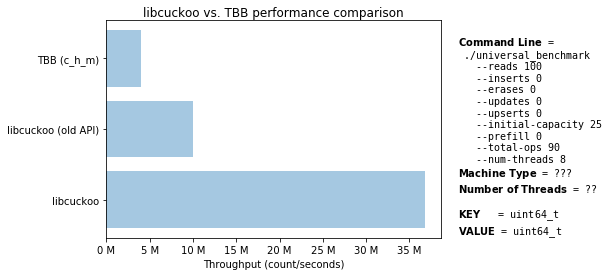

In [52]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
import json

def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.0f M' % (x*1e-6)

# Setup PDF output, one page for each graph (call to savefig)
pp = PdfPages('benchmarks.pdf')

# Get the data
with open('output1.json') as f:
    data = json.load(f)

plt.title('libcuckoo vs. TBB performance comparison')

# Set up the y-axis
tables = (data['table'], 'libcuckoo (old API)', 'TBB (c_h_m)')
y_pos = np.arange(len(tables))

# Set up the x-axis
plt.xlabel('%s (%s)' % (
        data['output']['throughput']['name'],
        data['output']['throughput']['units']
    ))
xvalues = (data['output']['throughput']['value'] , 10e6, 4e6)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(millions))

plt.barh(y_pos, xvalues, align='center', alpha=0.4)
plt.yticks(y_pos, tables)

metadata_text = r'''
$\bf{Command\ Line}$ =
 %s
$\bf{Machine\ Type}$ = ???
$\bf{Number\ of\ Threads}$ = ??

$\bf{KEY}$   = %s
$\bf{VALUE}$ = %s
''' % (
    #textwrap.fill(data['command'], 40, subsequent_indent='  '),
    data['command'].replace(' --', '\n   --'),
    data['key'],
    data['value']
)
metadata = plt.text(plt.xlim()[1] + 2e6, 2.5, metadata_text, verticalalignment='top', family='monospace')

pp.savefig(bbox_extra_artists=(metadata,), bbox_inches='tight')
pp.close()

plt.show()